In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
def sigmoid(x):
    return 1/(1+np.exp(-x))

In [3]:
def quality(parameters,data):
    Y=data["AboveMedianPrice"]
    Y=Y.values.reshape(-1,1)
    Y=Y.T
    X=data.drop(columns="AboveMedianPrice")
    X=X.T
    pred,c=forward_propagation(X, parameters)
    Aclass=Y
    a=[0 if x<0.5 else 1 for y in pred for x in y]
    
    
    cor,tp,fp,fn,tn=0,0,0,0,0                                        # manging count of correct classifications
    
    for i in range(len(a)):
        if Aclass[0][i]==a[i]:
            cor=cor+1
        if Aclass[0][i]==1 and a[i]==1:
            tp=tp+1
        elif Aclass[0][i]==0 and a[i]==1:
            fp=fp+1
        elif Aclass[0][i]==1 and a[i]==0:
            fn=fn+1
        elif Aclass[0][i]==0 and a[i]==0:
            tn=tn+1
    
    
    if tp==0 :
        fscore=0
    else:
        prec=tp/(tp+fp)
        recall=tp/(tp+fn)
        fscore=2*((prec*recall)/(prec+recall))
    
    return (cor/len(a))*100,fscore                                  # returning %  of data classified correct and f score 

In [4]:
def layer_sizes(X, Y):
    
    n_x = X.shape[0]
    n_h = 8 
    n_y = Y.shape[0] 

    return (n_x, n_h, n_y)

In [5]:
def initialize_parameters(n_x, n_h, n_y):

    np.random.seed(2) 
    W1 = np.random.randn(n_h,n_x)
    b1 = np.zeros((n_h,1))
    W2 = np.random.randn(n_y,n_h)
    b2 = np.zeros((n_y,1))
    
    parameters = {"W1": W1,
                  "b1": b1,
                  "W2": W2,
                  "b2": b2}
    
    return parameters

In [6]:
def forward_propagation(X, parameters):
    W1 = parameters["W1"]
    b1 = parameters["b1"]
    W2 = parameters["W2"]
    b2 = parameters["b2"]

    Z1 = np.dot(W1,X)+b1
    A1 = np.tanh(Z1)
    Z2 = np.dot(W2,A1)+b2
    A2 = sigmoid(Z2)
    
    cache = {"Z1": Z1,
             "A1": A1,
             "Z2": Z2,
             "A2": A2}
    
    return A2, cache

In [7]:
def compute_cost(A2, Y, parameters):

    
    m = Y.shape[1] 

    logprobs = np.multiply(np.log(A2),Y)+np.multiply(np.log(1-A2),1-Y)
    cost =  (-1/m)* np.sum(logprobs)
    
    cost = float(np.squeeze(cost))   
                                
    
    return cost

In [8]:
def backward_propagation(parameters, cache, X, Y):
    m = X.shape[1]
    
    W1 =  parameters["W1"]
    W2 =  parameters["W2"]
    
    A1 = cache['A1']
    A2 = cache['A2']

    dZ2 = A2-Y
    dW2 = np.dot(dZ2,A1.T)*(1/m)
    db2 = np.sum(dZ2,axis=1,keepdims=True)*(1/m)
    dZ1 = np.dot(W2.T,dZ2)*(1-np.power(A1, 2))
    dW1 = np.dot(dZ1,X.T)*(1/m)
    db1 = np.sum(dZ1,axis=1,keepdims=True)*(1/m)
    
    grads = {"dW1": dW1,
             "db1": db1,
             "dW2": dW2,
             "db2": db2}
    
    return grads

In [9]:
def update_parameters(parameters, grads, learning_rate):
    W1 = parameters["W1"]
    b1 = parameters["b1"]
    W2 = parameters["W2"]
    b2 = parameters["b2"]
    
    dW1 = grads['dW1']
    db1 = grads['db1']
    dW2 = grads['dW2']
    db2 = grads['db2']
    
    W1 = W1-learning_rate*dW1
    b1 = b1-learning_rate*db1
    W2 = W2-learning_rate*dW2
    b2 = b2-learning_rate*db2
    
    parameters = {"W1": W1,
                  "b1": b1,
                  "W2": W2,
                  "b2": b2}
    
    return parameters

In [10]:
def nn_model(X, Y, n_h, num_iterations,eta):
    
    n_x = layer_sizes(X, Y)[0]
    n_y = layer_sizes(X, Y)[2]
    
    parameters = initialize_parameters(n_x, n_h, n_y)
    
    # Loop (gradient descent)
    err=[]

    for i in range(0, num_iterations):
         
        A2, cache =  forward_propagation(X, parameters)
        cost = compute_cost(A2, Y, parameters)
        grads = backward_propagation(parameters, cache, X, Y)
        parameters = update_parameters(parameters, grads,eta)
        if i%10==0:
            err.append(cost)
    y=[i for  i in range(len(err))]
    x=err
    plt.plot(y,x)
    plt.xlabel('iter / 10')
    plt.ylabel('error')
    plt.show()
        

    return parameters

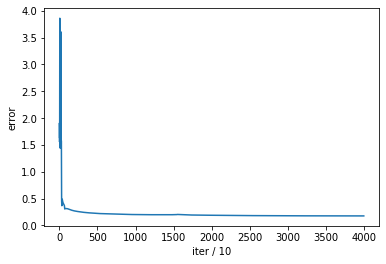

In [11]:
data=pd.read_csv("housepricedata.csv")
data=(data-data.min())/(data.max()-data.min())

train=data.sample(frac=0.8,random_state=200) 
test=data.drop(train.index) 

X=train.drop(columns="AboveMedianPrice")
X=X.T

Y=train["AboveMedianPrice"]
Y=Y.values.reshape(-1,1)
Y=Y.T

results=nn_model(X, Y, 7,40000,5)
#print(results)

In [12]:
acctest,fsc=quality(results,test)
print("test ",acctest,fsc)
acctrain,fsc=quality(results,train)
print("train",acctrain,fsc)


test  90.06849315068493 0.9102167182662538
train 93.23630136986301 0.9317199654278306


In [13]:
#(55.13698630136986, 0.7108167770419427) 7,10,0.1
#(53.42465753424658, 0.6792452830188679) 7,20,0.1
#(55.13698630136986, 0.7108167770419427) 7, 90,0.01
#(89.72602739726028, 0.906832298136646)  7,1000,0.1  and scaling of data from 0-1 for every coloumn
#(80.47945205479452, 0.8277945619335348) 7,100,0.01  and scaling of data from 0-1 for every coloumn
#(71.57534246575342, 0.7738419618528611) 7,10,0.1    and scaling of data from 0-1 for every coloumn
#(89.04109589041096, 0.9012345679012346) 10,1000,0.1 and scaling of data from 0-1 for every coloumn
#(90.06849315068493, 0.9123867069486403) 7,1000,1   and scaling
#(90.41095890410958, 0.9156626506024096) 7,1000,2   and scaling
#(90.75342465753424, 0.9184290030211482) 7,1000,3   and scaling